In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv'

table = pd.read_csv(file)

# cleaning up the data to make it more readable
for rank, row in table.iterrows():
    #cleaning up date of match
    date = table.at[rank, 'tourney_date']
    
    year = int(date/10000)
    month = int(date/100)%1000
    day = date%100

    table.at[rank, 'tourney_year'] = int(year)
    table.at[rank, 'tourney_month'] = int(month)
    table.at[rank, 'tourney_day'] = int(day)
    
    #cleaning up ages
    w_age = int(table.at[rank, 'winner_age'])
    l_age = int(table.at[rank, 'loser_age'])
    
    table.at[rank, 'winner_age'] = w_age
    table.at[rank, 'loser_age'] = l_age
    
    
    
# only keep important columns to make more readable
table = table[['tourney_name', 'surface', 'winner_name', 'winner_hand', 'winner_age', 
               'loser_name', 'loser_hand', 'loser_age', 'score', 'minutes', 'tourney_year', 
               'tourney_month', 'tourney_day']]

#rename to fit on screen
table.rename(columns={'winner_name':'w_name', 'winner_hand':'w_hand', 'winner_age':'w_age',
                        'loser_name':'l_name', 'loser_hand':'l_hand', 'loser_age':'l_age',
                        'tourney_name':'tn_name', 'tourney_year':'tn_year', 'tourney_month':'tn_month',
                         'tourney_day':'tn_day'}, inplace=True)
print(table.columns)
table.head()
    


Index(['tn_name', 'surface', 'w_name', 'w_hand', 'w_age', 'l_name', 'l_hand',
       'l_age', 'score', 'minutes', 'tn_year', 'tn_month', 'tn_day'],
      dtype='object')


,tn_name,surface,w_name,w_hand,w_age,l_name,l_hand,l_age,score,minutes,tn_year,tn_month,tn_day
0,Atp Cup,Hard,Novak Djokovic,R,32.0,Rafael Nadal,L,33.0,6-2 7-6(4),115.0,2020.0,1.0,6.0
1,Atp Cup,Hard,Roberto Bautista Agut,R,31.0,Dusan Lajovic,R,29.0,7-5 6-1,97.0,2020.0,1.0,6.0
2,Atp Cup,Hard,Novak Djokovic,R,32.0,Daniil Medvedev,R,23.0,6-1 5-7 6-4,167.0,2020.0,1.0,6.0
3,Atp Cup,Hard,Dusan Lajovic,R,29.0,Karen Khachanov,R,23.0,7-5 7-6(1),108.0,2020.0,1.0,6.0
4,Atp Cup,Hard,Rafael Nadal,L,33.0,Alex De Minaur,R,20.0,4-6 7-5 6-1,133.0,2020.0,1.0,6.0


<BarContainer object of 10 artists>

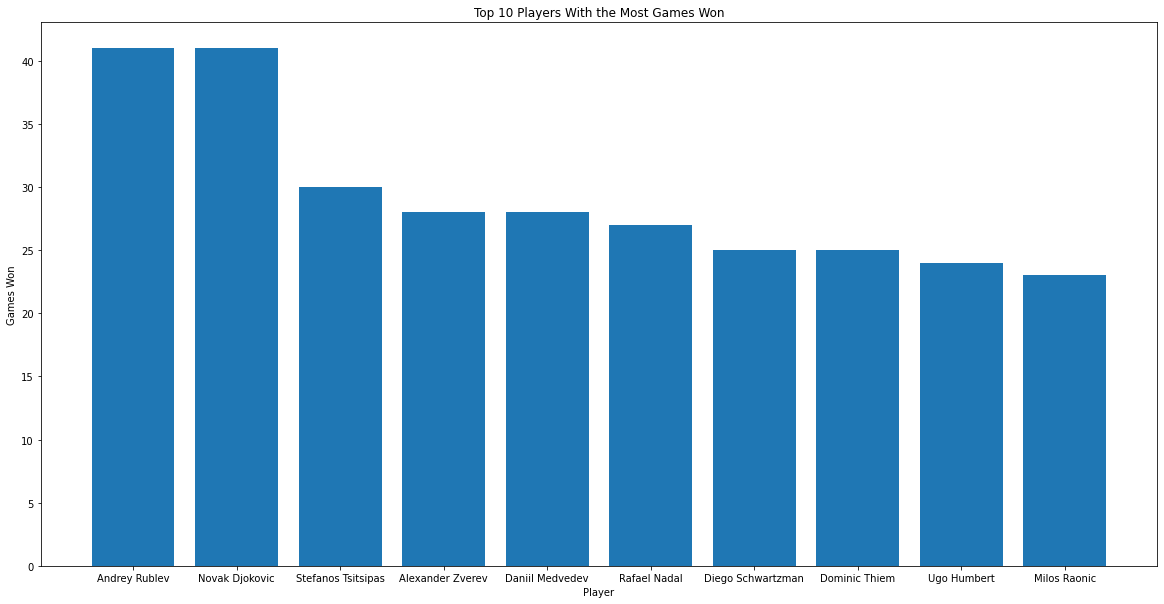

In [160]:
# Bar graph of the top 10 overall tournament winners

top_dict = {}

# getting all the players games won
for rank, row in table.iterrows():
    k = table.at[rank, 'w_name']
    if k in top_dict:
        top_dict[k] = top_dict[k] + 1
    else:
        top_dict[k] = 1
        
# sorting dictionary by games won
top_dict = dict(reversed(sorted(top_dict.items(), key = lambda item: item[1])))

# getting keys and values to plot
names = list(top_dict.keys())
games_won = list(top_dict.values())

# getting top ten
names = names[:10]
games_won = games_won[:10]

# formatting bar graph
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.title('Top 10 Players With the Most Games Won')
plt.xlabel('Player')
plt.ylabel('Games Won')
plt.bar(names, games_won)

<BarContainer object of 25 artists>

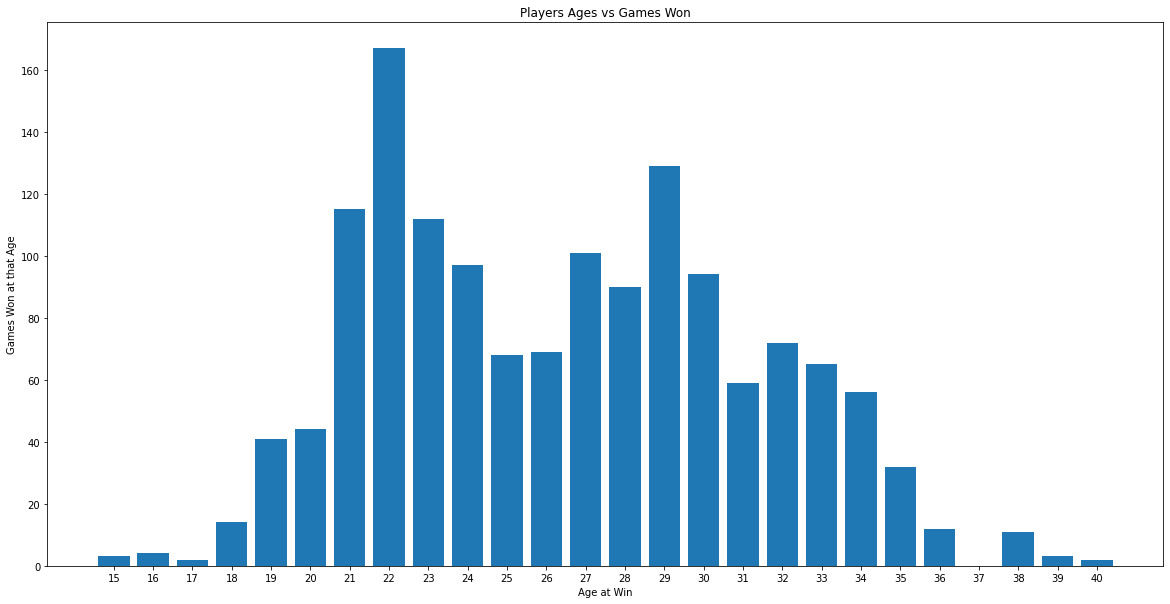

In [168]:
# Peak age for tennis player 

age_dict = {}

for rank, row in table.iterrows():
    k = table.at[rank, 'w_age']
    if k in age_dict:
        age_dict[k] = age_dict[k] + 1
    else:
        age_dict[k] = 1
        
# sorting dictionary by ages
age_dict = dict((sorted(age_dict.items(), key = lambda item: item[0])))

ages = list(age_dict.keys())
games_won_at_age = list(age_dict.values())

# formatting bar graph
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.title('Players Ages vs Games Won')
plt.xlabel('Age at Win')
plt.ylabel('Games Won at that Age')
plt.xticks(np.arange(min(ages), max(ages)+1, 1.0))
plt.bar(ages, games_won_at_age)

<BarContainer object of 3 artists>

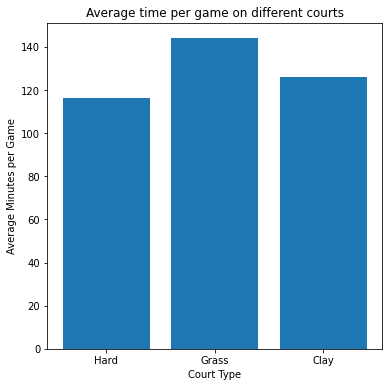

In [193]:
# On which surface do games last the longest

hard = np.array([])
grass = np.array([])
clay = np.array([])

for rank, row in table.iterrows():
    if not np.isnan(table.at[rank, 'minutes']):
        if table.at[rank, 'surface'] == 'Hard':
            hard = np.append(hard, table.at[rank, 'minutes'])
        elif table.at[rank, 'surface'] == 'Grass':
            grass = np.append(grass, table.at[rank, 'minutes'])
        elif table.at[rank, 'surface'] == 'Clay':
            clay = np.append(clay,  table.at[rank, 'minutes'])
        

mean_hard = np.mean(hard)
mean_grass = np.mean(grass)
mean_clay = np.mean(clay)

x = ['Hard', 'Grass', 'Clay']
y = [mean_hard, mean_grass, mean_clay]

# formatting bar graph
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title('Average time per game on different courts')
plt.xlabel('Court Type')
plt.ylabel('Average Minutes per Game')
plt.bar(x, y)

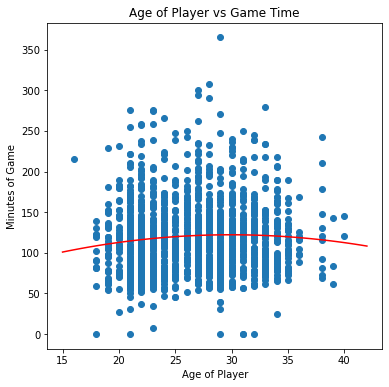

In [212]:
# winner age vs game time scatter plot

age = np.array([])
game_time = np.array([])

for rank, row in table.iterrows():
    if not np.isnan(table.at[rank, 'minutes']):
        age = np.append(age, table.at[rank, 'w_age'])
        game_time = np.append(game_time, table.at[rank, 'minutes'])
        
# line of fit

model = np.poly1d(np.polyfit(age, game_time, 2))
line = np.linspace(15, 42, 50)
                              
# formatting scatter plot
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title('Age of Player vs Game Time')
plt.xlabel('Age of Player')
plt.ylabel('Minutes of Game')
plt.scatter(age, game_time)
plt.plot(line, model(line), color = 'red')
plt.show()

In [60]:
# Best player for each surface

In [194]:
# Which hand has the higher percentage of wins

In [ ]:
# Average minutes per game